# Unsupervised Learning
tujuannya:
- mencari struktur data
- mengurangi dimensi

pelajari:
- K-Means Clustering
- Principal Component Analysis

# Principal Component Analysis

dari semua data yang ada, dengan fitur-fiturnya, kita akan cari kombinasi fitur yang paling membuat variasi di dalam datanya. kombinasi fitur ini adalah Principal Component.

Misalnya diberi data 2 fitur, tanpa target, normalnya 2 dimensi. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

Text(0, 0.5, 'luas tanah')

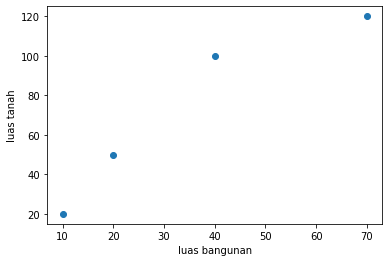

In [3]:
luas_rumah = [10,20,40,70]
luas_tanah = [20,50,100,120]

plt.scatter(x=luas_rumah, y=luas_tanah)
plt.xlabel("luas bangunan")
plt.ylabel("luas tanah")

# PCA in Python

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [4]:
breast = load_breast_cancer()

breast_data = breast.data
print("bentuk data:", breast_data.shape)

bentuk data: (569, 30)


In [20]:
# print(breast.DESCR)

In [14]:
# breast.feature_names # nama-nama fiturnya

In [18]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
breast_labels = np.reshape(breast.target, (569,1))
print("bentuk label:", breast_labels.shape)

bentuk label: (569, 1)


In [17]:
df = pd.DataFrame(breast_data, columns=breast.feature_names)
df["labels"] = breast_labels

display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [23]:
# df[df.labels==1].shape # malignant yang label 0, benign yang label 1

# Visualisasi Data dengan PCA
data sudah disiapkan, sekarang kita cari kombinasi fiturnya (ada 30 fitur) yang paling menjelaskan variasi antar data

In [32]:
x = df.loc[:, breast.feature_names].values
print(x.shape) # ambil data tanpa target

(569, 30)


In [37]:
# scale data nya
scaler = StandardScaler()
x = scaler.fit_transform(x)

print(x.shape)

(569, 30)


In [38]:
pd.DataFrame(x, columns = breast.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [40]:
# bikin model PCA nya
pca_breast = PCA(n_components=2)
pc_breast = pca_breast.fit_transform(x)

In [42]:
# bikin DataFrame perbandingan PC nya
df_pc_breast = pd.DataFrame(
    data = pc_breast,
    columns=["PC1", "PC2"]
)
display(df_pc_breast)

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [43]:
# cek setiap PC menjelaskan berapa % variasi data
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [44]:
pca_breast.explained_variance_ratio_.sum()

0.6324320765155933

In [51]:
df_pc_breast['labels'] = df.labels.replace({0:'malignant', 1:'benign'})
df_pc_breast

,PC1,PC2,labels
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant
...,...,...,...
564,6.439315,-3.576817,malignant
565,3.793382,-3.584048,malignant
566,1.256179,-1.902297,malignant
567,10.374794,1.672010,malignant


Text(0, 0.5, 'PC2 19.0%')

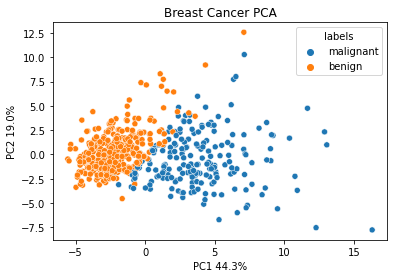

In [58]:
# visualisasi variasi data dengan PC1 dan PC2
import seaborn as sns

[p_pc1, p_pc2] = pca_breast.explained_variance_ratio_

sns.scatterplot(
    x="PC1", 
    y="PC2", 
    data=df_pc_breast,
    hue="labels"
)

plt.title("Breast Cancer PCA")
plt.xlabel("PC1 " + str(p_pc1.round(3)*100) + "%")
plt.ylabel("PC2 " + str(p_pc2.round(3)*100) + "%")

# pembuatan scree plot

In [ ]:
# ini tambahan, function untuk membuat scree plot, masukkan argumen model pca nya saja
def scree_plot(pca, figsize=(10,6)):
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
    
    index = range(1, len(per_var)+1)
    n = len(pca.explained_variance_ratio_)
    
    labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
    
    figure(figsize=figsize, dpi=80)
    plt.bar(x=index, height=per_var, tick_label=labels)
    plt.ylabel("% explained variance")
    plt.xlabel("Principal Component")
    plt.title("Scree Plot (total="+str(np.round(pca.explained_variance_ratio_.sum()*100, decimals=2))+"%)")
    
    for i in range(n):
        plt.annotate(str(per_var[i])+"%", (index[i], per_var[i]),
            va="bottom", ha="center", fontsize=12)

Text(1, 18.971182044033018, '18.97')

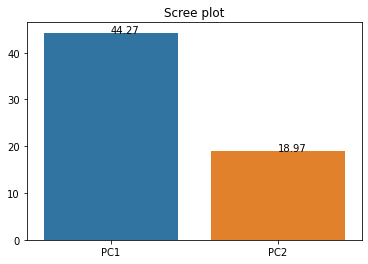

In [74]:
evr = pca_breast.explained_variance_ratio_*100

sns.barplot(
    x=["PC1", "PC2"],
    y=evr)

plt.title("Scree plot")

plt.annotate( xy=(0,evr[0]), text=evr[0].round(2) )
plt.annotate( xy=(1,evr[1]), text=evr[1].round(2) )

<Figure size 432x288 with 0 Axes>

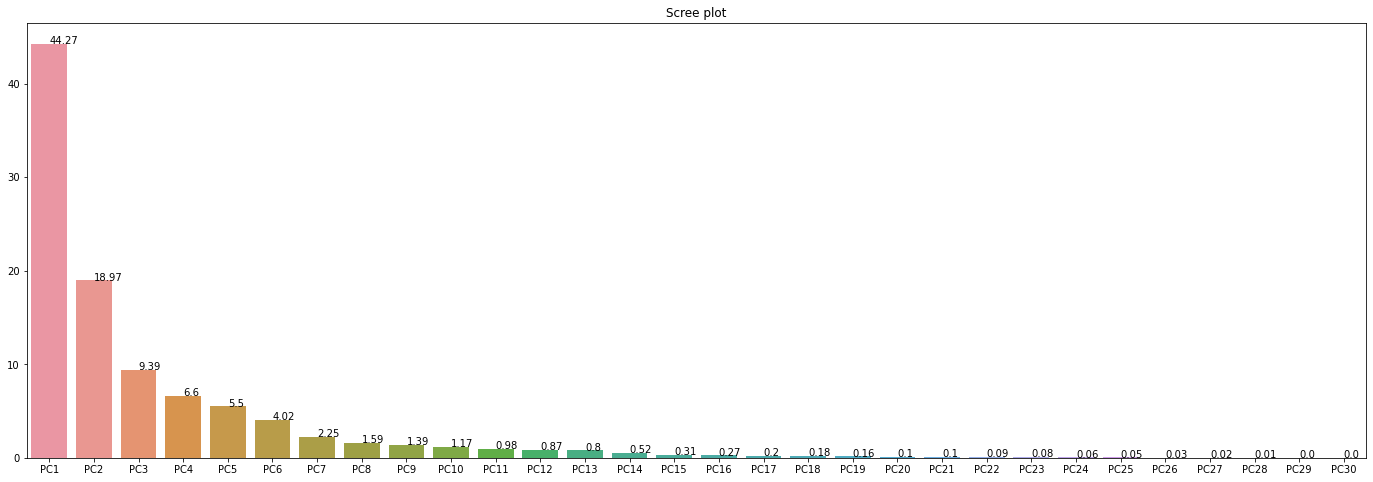

In [86]:
x = df.loc[:, breast.feature_names].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

pca_breast = PCA()
pc_breast = pca_breast.fit_transform(x)

cols = []
for i in range(1,31):
    cols.append("PC"+str(i))


df_pc_breast = pd.DataFrame(
    data = pc_breast,
    columns=cols
)

df_pc_breast['labels'] = df.labels.replace({0:'malignant', 1:'benign'})

evr = pca_breast.explained_variance_ratio_*100

plt.figure()
plt.figure(figsize=(24,8))
sns.barplot(
    x=cols,
    y=evr)

plt.title("Scree plot")

for i in range(30):
    plt.annotate( xy=(i,evr[i]), text=evr[i].round(2) )

# K-Means Clustering
k: ada berapa cluster

untuk mencari cluster dengan teknik K-Means kita akan:
1. pilih k, berapa cluster
2. pilih titik random "centroid" sejumlah k dari data
3. semua titik yang paling dekat dengan masing2 centroid menjadi sebuah cluster milik centroid tersebut
4. dari setiap cluster, hitung ulang posisi centroid nya sehingga letaknya pas di tengah cluster
5. ulang lagi dari centroid yang baru, buat cluster2 baru (no.3) dan (no.4) hitung lagi centroid baru, terus berulang

berhenti saat:
1. centroid tidak pindah
2. titik cluster tidak ada yang berubah
3. jumlah perulangan mencapai maksimal

Untuk mencari jumlah k yang optimal, kita bisa membuat   
**elbow curve** yang plotting inertia (y-axis) dengan jumlah k (x-axis). 

Semakin kecil inertia, cluster kita semakin spesifik. Kita akan pilih jumlah k yang inertia nya lumayan sedikit, dan tidak terlalu mahal secara komputasi

# K Means in Python

In [87]:
from sklearn.cluster import KMeans

In [90]:
# buat data
X = -2*np.random.rand(100,2)
X1 = 1+2*np.random.rand(50,2)
X[50:100, :] = X1

print(pd.DataFrame(X).shape)
pd.DataFrame(X).head()

(100, 2)


,0,1
0,-0.704569,-0.976224
1,-0.480428,-1.520611
2,-0.820448,-1.881184
3,-1.623794,-1.386941
4,-0.418449,-1.264086


<AxesSubplot:>

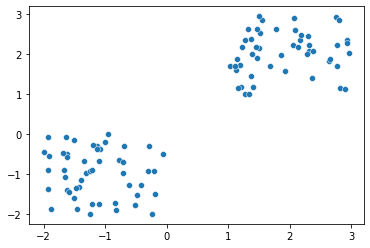

In [91]:
# visualisasi data 2 dimensi
sns.scatterplot(x=X[:,0], y=X[:,1])

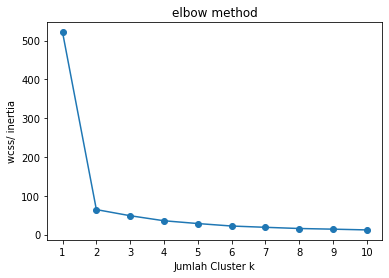

In [98]:
# pakai elbow method untuk menentukan jumlah k yang optimal
wcss = []
jumlah_k = range(1,11)

for i in jumlah_k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# pd.DataFrame({"inertia": wcss, "k": jumlah_k})

plt.plot(jumlah_k, wcss, marker="o")
plt.xticks(jumlah_k)
plt.xlabel("Jumlah Cluster k")
plt.ylabel("wcss/ inertia")
plt.title("elbow method")

plt.show()

disini kelihatan kalau jumlah cluster k = 2 ideal, dengan inertia menurun drastis, dan computation cost masih murah (k=2). lalu k=2 ke k=3 inertia menurun sangat sedikit.

In [100]:
# bikin model
KMean = KMeans(n_clusters=2)
# training model
KMean.fit(X)

KMeans(n_clusters=2)

In [103]:
# lihat lokasi cluster center nya
centroids = KMean.cluster_centers_
centroids

array([[ 1.90535361,  2.03225104],
       [-1.14847379, -0.96070491]])

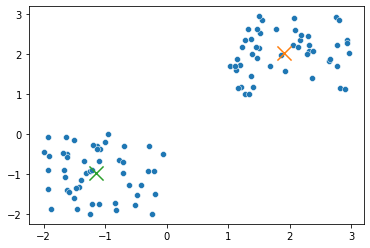

In [109]:
# visualisasi 
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.scatter(1.90535361,  2.03225104, marker="x", s=200)
plt.scatter(-1.14847379,-0.96070491, marker="x", s=200)

# Latihan dengan real data
wholesale customers data csv
https://archive.ics.uci.edu/ml/datasets/wholesale+customers

In [112]:
df = pd.read_csv('data/Wholesale_customers_data.csv')
print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [111]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [114]:
# scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [119]:
# bikin dan training model
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)

# inertia
kmeans.inertia_

2599.3855593561393

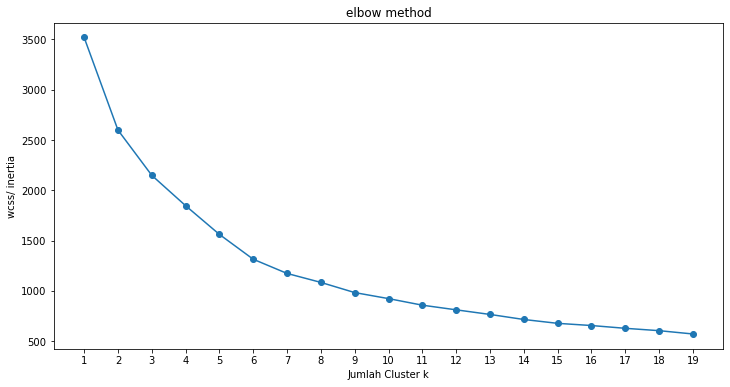

In [123]:
# bikin elbow method untuk menentukan jumlah cluster
wcss = []
jumlah_k = range(1,20)

for i in jumlah_k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
# bikin plot untuk elbow method
plt.figure(figsize=(12,6))
plt.plot(jumlah_k, wcss, marker="o")
plt.xticks(jumlah_k)
plt.xlabel("Jumlah Cluster k")
plt.ylabel("wcss/ inertia")
plt.title("elbow method")

plt.show()

dari elbow method plot nya sepertinya jumlah cluster yang cocok ada antara 5-8. kita pilih k=6

In [124]:
# k means menggunakan 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_scaled)

# bikin prediksi
pred = kmeans.predict(df_scaled)

In [127]:
df_summary = pd.DataFrame(df_scaled)
df_summary['cluster'] = pred
df_summary['cluster'].value_counts()

1    172
2    125
0     86
4     46
5     10
3      1
Name: cluster, dtype: int64

In [131]:
df['cluster'] = pred

In [132]:
df[df['cluster']==1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,172.0,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,1.0,3.0,9133.005814,2983.023256,3440.180233,2235.767442,772.395349,999.744186,1.0
std,0.0,0.0,7321.473931,2988.033265,2939.576947,2233.887712,1115.070798,1005.315157,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.0
25%,1.0,3.0,3094.500000,1131.250000,1656.250000,596.750000,172.250000,341.500000,1.0
50%,1.0,3.0,7149.000000,2007.000000,2489.500000,1395.500000,352.500000,689.500000,1.0
75%,1.0,3.0,13558.750000,3708.000000,4248.000000,3152.500000,915.000000,1329.250000,1.0
max,1.0,3.0,31812.000000,21858.000000,16483.000000,9735.000000,6907.000000,5137.000000,1.0


In [133]:
df[df['cluster']==2].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,125.0,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.0
mean,2.0,2.672000,7762.856000,9173.568000,14341.768000,1376.256000,6163.592000,1659.128000,2.0
std,0.0,0.644781,7305.471107,5286.803442,6799.923084,1294.345749,3468.760948,1970.945111,0.0
min,2.0,1.000000,18.000000,1124.000000,4523.000000,33.000000,549.000000,3.000000,2.0
25%,2.0,3.000000,1989.000000,6152.000000,9568.000000,480.000000,3837.000000,531.000000,2.0
50%,2.0,3.000000,5417.000000,7779.000000,12232.000000,1031.000000,5162.000000,1265.000000,2.0
75%,2.0,3.000000,11867.000000,11114.000000,19172.000000,1762.000000,7677.000000,2124.000000,2.0
max,2.0,3.000000,31714.000000,36423.000000,36486.000000,8132.000000,17120.000000,16523.000000,2.0


In [134]:
for i in range(6):
    print("cluster number:", i)
    display(df[df['cluster']==i].describe())

cluster number: 0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,1.046512,1.313953,10517.569767,3208.755814,4128.313953,3136.674419,868.186047,1068.488372,0.0
std,0.211825,0.466820,8003.506597,3710.931508,3335.332414,3067.466801,1240.678937,1025.708131,0.0
min,1.000000,1.000000,3.000000,258.000000,489.000000,91.000000,5.000000,7.000000,0.0
25%,1.000000,1.000000,4070.250000,1051.500000,1820.000000,957.000000,206.250000,384.000000,0.0
50%,1.000000,1.000000,8770.500000,1914.000000,2885.000000,2164.500000,389.500000,796.000000,0.0
75%,1.000000,2.000000,15654.000000,3735.000000,5315.250000,4308.000000,818.500000,1352.000000,0.0
max,2.000000,2.000000,31614.000000,23527.000000,16966.000000,15601.000000,5828.000000,6854.000000,0.0


cluster number: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,172.0,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,1.0,3.0,9133.005814,2983.023256,3440.180233,2235.767442,772.395349,999.744186,1.0
std,0.0,0.0,7321.473931,2988.033265,2939.576947,2233.887712,1115.070798,1005.315157,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.0
25%,1.0,3.0,3094.500000,1131.250000,1656.250000,596.750000,172.250000,341.500000,1.0
50%,1.0,3.0,7149.000000,2007.000000,2489.500000,1395.500000,352.500000,689.500000,1.0
75%,1.0,3.0,13558.750000,3708.000000,4248.000000,3152.500000,915.000000,1329.250000,1.0
max,1.0,3.0,31812.000000,21858.000000,16483.000000,9735.000000,6907.000000,5137.000000,1.0


cluster number: 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,125.0,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.0
mean,2.0,2.672000,7762.856000,9173.568000,14341.768000,1376.256000,6163.592000,1659.128000,2.0
std,0.0,0.644781,7305.471107,5286.803442,6799.923084,1294.345749,3468.760948,1970.945111,0.0
min,2.0,1.000000,18.000000,1124.000000,4523.000000,33.000000,549.000000,3.000000,2.0
25%,2.0,3.000000,1989.000000,6152.000000,9568.000000,480.000000,3837.000000,531.000000,2.0
50%,2.0,3.000000,5417.000000,7779.000000,12232.000000,1031.000000,5162.000000,1265.000000,2.0
75%,2.0,3.000000,11867.000000,11114.000000,19172.000000,1762.000000,7677.000000,2124.000000,2.0
max,2.0,3.000000,31714.000000,36423.000000,36486.000000,8132.000000,17120.000000,16523.000000,2.0


cluster number: 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
25%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
50%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
75%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
max,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0


cluster number: 4


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,1.065217,2.782609,35606.304348,4860.717391,5512.086957,9961.565217,889.152174,2659.456522,4.0
std,0.249637,0.593035,19362.663648,5111.798317,4547.261998,10151.161253,993.767600,3022.297476,0.0
min,1.000000,1.000000,4983.000000,286.000000,471.000000,532.000000,20.000000,3.000000,4.0
25%,1.000000,3.000000,24285.250000,2177.000000,2500.000000,4486.750000,263.000000,1103.000000,4.0
50%,1.000000,3.000000,33585.500000,3832.500000,4613.000000,8656.000000,612.000000,1894.000000,4.0
75%,1.000000,3.000000,43012.500000,4997.250000,7067.500000,13201.000000,1103.250000,2834.000000,4.0
max,2.000000,3.000000,112151.000000,29627.000000,21042.000000,60869.000000,4948.000000,14472.000000,4.0


cluster number: 5


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,2.0,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,5.0
std,0.0,0.849837,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504,0.0
min,2.0,1.000000,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000,5.0
25%,2.0,2.250000,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000,5.0
50%,2.0,3.000000,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000,5.0
75%,2.0,3.000000,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000,5.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000,5.0


Text(0.5, 1.0, 'Customers from cluster 0')

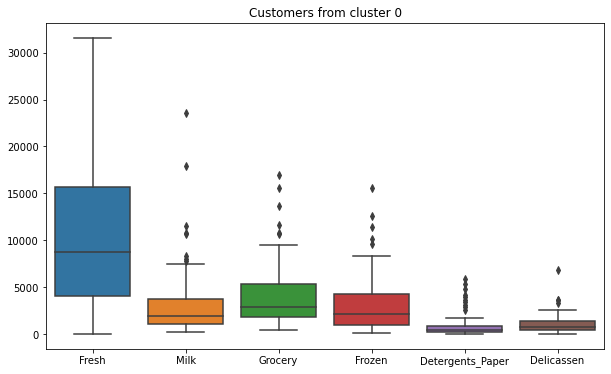

In [153]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['cluster']==0].drop(labels=["Channel","Region","cluster"], axis=1))

plt.title("Customers from cluster 0")